# K-Means Clustering - XM

Bu yarışmanın amacı, K-ortalama kümelemesinin temellerini, standart bir K-ortalama kümeleme analizinin nasıl gerçekleştirileceğini ve bunu değerlendirmek için hangi metrikleri kullanabileceğimizi anlamaktır.

<img src="https://developers.google.com/static/machine-learning/clustering/images/clustering_example.png">

<a href="https://www.kaggle.com/competitions/k-means-clustering-xm/data">Dataya Buradan Erişebilirsiniz</a>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head()

,ID,RRmean,PTdis,STdis,RRTot,SDRR,hbpermin,PQdis,PQslope,QRdis,QRSseg,PQseg,Pseg,NN50,STseg,STslope,Tseg
0,0,358.185185,95.000002,36.375684,28,118.947245,60.179104,24.164337,-0.039751,16.971024,0.095734,0.068552,0.029563,11,0.101091,0.017092,0.108631
1,1,84.134454,20.786934,13.809141,120,3.059424,91.428571,7.078599,-0.193178,0.050422,0.021151,0.063310,0.050924,1,0.100705,0.063261,0.089558
2,2,315.258064,89.258170,21.690140,32,11.503065,68.571429,29.003153,-0.013569,22.501573,0.101389,0.084500,0.064722,4,0.068889,0.034507,0.094667
3,3,197.693878,38.413132,25.029068,50,1.798004,75.000000,13.531768,-0.136163,0.000000,0.000000,0.053095,0.064714,0,0.100000,0.048226,0.100190
4,4,312.838710,105.806455,35.747960,32,11.273997,68.503469,38.327021,-0.015234,16.125269,0.088108,0.106771,0.043837,2,0.099306,0.018280,0.095399


In [4]:
df.shape

(900, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        900 non-null    int64  
 1   RRmean    900 non-null    float64
 2   PTdis     900 non-null    float64
 3   STdis     900 non-null    float64
 4   RRTot     900 non-null    int64  
 5   SDRR      900 non-null    float64
 6   hbpermin  900 non-null    float64
 7   PQdis     900 non-null    float64
 8   PQslope   900 non-null    float64
 9   QRdis     900 non-null    float64
 10  QRSseg    900 non-null    float64
 11  PQseg     900 non-null    float64
 12  Pseg      900 non-null    float64
 13  NN50      900 non-null    int64  
 14  STseg     900 non-null    float64
 15  STslope   900 non-null    float64
 16  Tseg      900 non-null    float64
dtypes: float64(14), int64(3)
memory usage: 119.7 KB


In [6]:
df.isnull().sum()

ID          0
RRmean      0
PTdis       0
STdis       0
RRTot       0
SDRR        0
hbpermin    0
PQdis       0
PQslope     0
QRdis       0
QRSseg      0
PQseg       0
Pseg        0
NN50        0
STseg       0
STslope     0
Tseg        0
dtype: int64

In [7]:
dosya=pd.DataFrame()

In [8]:
dosya["ID"]=df["ID"]

In [9]:
df=df.drop("ID",axis=1)

### Modelling

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#wcss= within cluster sum of squares
wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(df)
    tahmin=model.predict(df)
    ss1=silhouette_score(df,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.5281649327549861
0.5446702237032
0.48895004733964065
0.4198821267126638
0.44864719286255017
0.4376196584433783
0.42621543853468546
0.41942152342620526


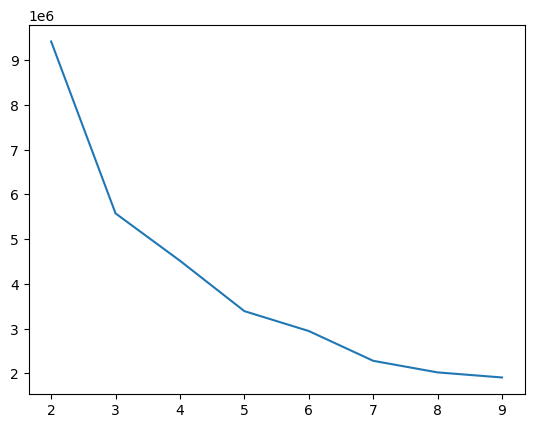

In [12]:
plt.plot(range(2,10),wcss)

In [13]:
from yellowbrick.cluster import KElbowVisualizer

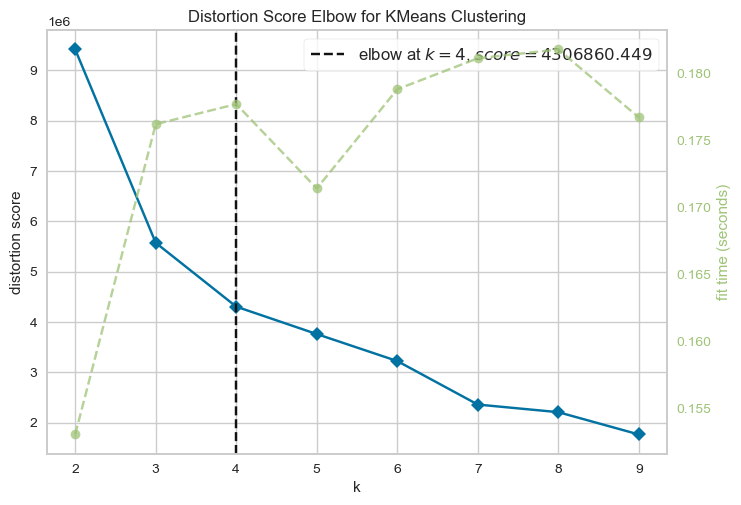

In [30]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(df)
vis.show();

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [16]:
model=KMeans(4,random_state=42)

In [17]:
model.fit(df)

KMeans(n_clusters=4, random_state=42)

In [18]:
tahmin=model.predict(df)

In [19]:
silhouette_score(df,tahmin)

0.48895004733964065

In [20]:
df["Cluster"]=tahmin

In [21]:
data=linkage(df,method="complete")

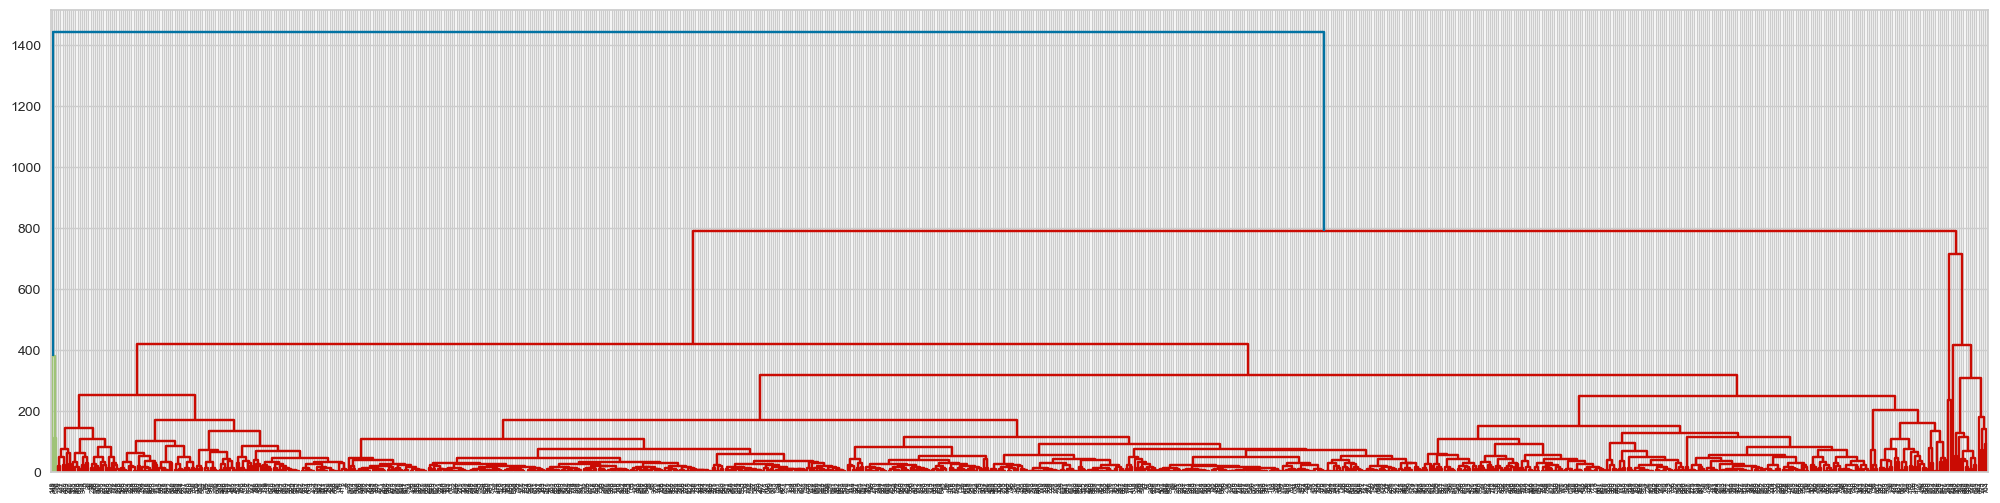

In [22]:
plt.figure(figsize=(25,6))
dendrogram(data);

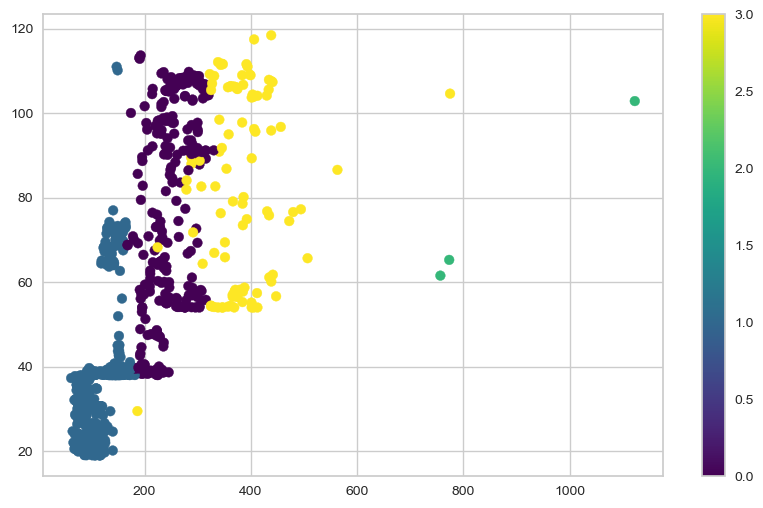

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(df["RRmean"],df["PTdis"], c=tahmin, cmap='viridis')
plt.colorbar()

In [24]:
df["Cluster"].value_counts()

Cluster
1    504
0    290
3    103
2      3
Name: count, dtype: int64

<Axes: xlabel='Cluster', ylabel='count'>

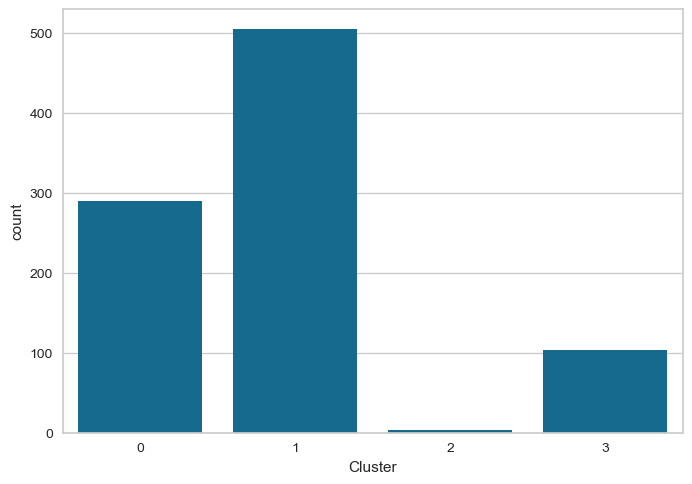

In [25]:
sns.countplot(x=df["Cluster"])

In [26]:
dosya["Category"]=tahmin

In [27]:
dosya.head(3)

,ID,Category
0,0,3
1,1,1
2,2,0


In [28]:
dosya.to_csv("tahmin.csv",index=False)

Bu projenin amacı kümeleme metriklerini kullanmaktı. Yellowbrick kullanarak verimizi 4 kümeye ayırmaya karar verdik ve ayırdık.